In [ ]:
%pip install icecream

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Lecture 04: PCA; Numpy 101; Rolling your own Scikit-Learn regressors and transformers

1. Preprocessing data transformations (`StandardScaler`, `PolynomialFeatures`)
2. Dimensionality reduction with Principal Component Analysis (PCA)

3. MNIST Fashion classification with PCA/LR and with a PCA/SVC pipelines

4. NumPy 101: Universal functions, broadcasting


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from icecream import ic

In [ ]:
(X_tr, y_tr), (X_te, y_te) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
ic(X_tr.shape, y_tr.shape, X_te.shape, y_te.shape, set(y_tr));

ic| X_tr.shape: (60000, 28, 28)
    y_tr.shape: (60000,)
    X_te.shape: (10000, 28, 28)
    y_te.shape: (10000,)
    set(y_tr): {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


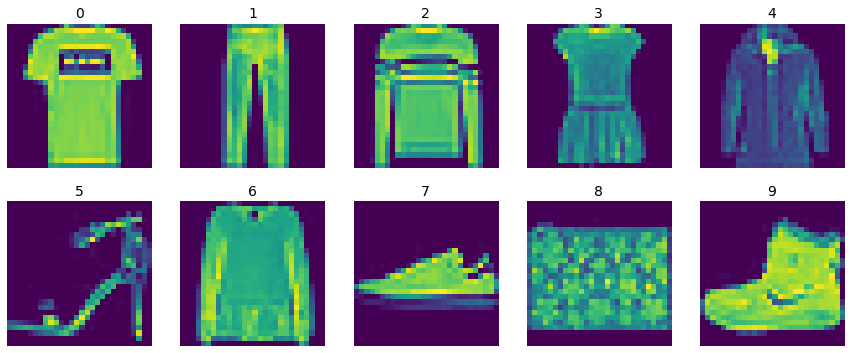

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.ravel()):
  x = X_tr[y_tr == i][0]  
  ax.imshow(x)
  ax.set_axis_off()
  ax.set_title(f"{i}", fontsize=14)

0: T-shirt/top,
1: Trouser,
2: Pullover,
3: Dress,
4: Coat,
5: Sandal,
6: Shirt,
7: Sneaker,
8: Bag,
9: Ankle boot

In [16]:
from os import replace
from sklearn.linear_model import LogisticRegression

In [18]:
%%time
I = np.random.choice(X_tr.shape[0], 1000, replace=False)

model = LogisticRegression(max_iter=10000)
#Maximum number of iterations taken for the solvers to converge.
model.fit(X_tr[I].reshape(-1, 28*28), y_tr[I])
#Flattening array: means converting a multidimensional array into a 1D array. reshape(-1) means this

CPU times: user 11.8 s, sys: 2.72 s, total: 14.5 s
Wall time: 9.62 s


LogisticRegression(max_iter=10000)

In [19]:
acc = accuracy_score(y_te, model.predict(X_te.reshape(-1, 28*28)))
ic(acc)

ic| acc: 0.766


0.766

In [20]:
%%time
I = np.random.choice(X_tr.shape[0], 2000, replace=False)
model = LogisticRegression(max_iter=10000)
model.fit(X_tr[I].reshape(-1, 28*28), y_tr[I])

CPU times: user 45.1 s, sys: 7.34 s, total: 52.4 s
Wall time: 32.9 s


LogisticRegression(max_iter=10000)

In [21]:
acc = accuracy_score(y_te, model.predict(X_te.reshape(-1, 28*28)))
ic(acc)

ic| acc: 0.7733


0.7733

In [22]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [23]:
%%time
model = make_pipeline(StandardScaler(), PCA(n_components=100), LogisticRegression(max_iter=10000))
model.fit(X_tr.reshape(-1, 28*28), y_tr)

CPU times: user 6min 36s, sys: 1min 34s, total: 8min 11s
Wall time: 5min 16s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=100)),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [24]:
acc_tr = accuracy_score(y_tr, model.predict(X_tr.reshape(-1, 28*28)))
acc_te = accuracy_score(y_te, model.predict(X_te.reshape(-1, 28*28)))
ic(acc_tr, acc_te)

ic| acc_tr: 0.85455, acc_te: 0.8387


(0.85455, 0.8387)

In [25]:
%%time

from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), PCA(n_components=100), SVC(C=15, kernel="rbf")) #the radial basis function kernel
#SVC The fit time scales at least quadratically with the number of samples, The multiclass support is handled according to a one-vs-one scheme.
#C=15, C is Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
model.fit(X_tr.reshape(-1, 28*28), y_tr)

CPU times: user 2min 24s, sys: 3.26 s, total: 2min 27s
Wall time: 2min 27s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=100)), ('svc', SVC(C=15))])

In [26]:
acc_tr = accuracy_score(y_tr, model.predict(X_tr.reshape(-1, 28*28)))
acc_te = accuracy_score(y_te, model.predict(X_te.reshape(-1, 28*28)))
ic(acc_tr, acc_te)

ic| acc_tr: 0.9550333333333333, acc_te: 0.8945


(0.9550333333333333, 0.8945)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = make_pipeline(StandardScaler(), PCA(), SVC())

param_grid = {
    "pca__n_components": [2, 4, 6],
    "svc__C": [0.1, 1, 10],
    "svc__kernel": ["linear", "rbf"]
}

search = GridSearchCV(model, param_grid=param_grid, scoring="accuracy", cv=5)
search.fit(X_tr.reshape(-1, 28*28)[:1000], y_tr[:1000])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': [2, 4, 6], 'svc__C': [0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='accuracy')

##PCA imputation example

https://asymptoticlabs.com/blog/posts/other_use_for_PCA_part2.html

# NumPy 101

## Universal Functions (`ufunc`)

> A universal function (or ufunc for short) is a function that operates on ndarrays in an element-by-element fashion, supporting array broadcasting, type casting, and several other standard features. That is, a ufunc is a “vectorized” wrapper for a function that takes a fixed number of specific inputs and produces a fixed number of specific outputs.
> 
> -- from [the NumPy docs](https://numpy.org/doc/stable/user/basics.ufuncs.html)

Most standard mathematical functions implemented in numpy are instances of `ufunc`:

In [ ]:
fs = [np.log, np.exp, np.sin, np.cos, np.arctan, np.absolute, np.floor, np.ceil, np.rint, np.sign]
#np.rint used to round numerical values to the nearest integer
for f in fs:
    ic(f, f.nin, f.nout)

ic| f: <ufunc 'log'>, f.nin: 1, f.nout: 1
ic| f: <ufunc 'exp'>, f.nin: 1, f.nout: 1
ic| f: <ufunc 'sin'>, f.nin: 1, f.nout: 1
ic| f: <ufunc 'cos'>, f.nin: 1, f.nout: 1
ic| f: <ufunc 'arctan'>, f.nin: 1, f.nout: 1
ic| f: <ufunc 'absolute'>, f.nin: 1, f.nout: 1
ic| f: <ufunc 'floor'>, f.nin: 1, f.nout: 1
ic| f: <ufunc 'ceil'>, f.nin: 1, f.nout: 1
ic| f: <ufunc 'rint'>, f.nin: 1, f.nout: 1
ic| f: <ufunc 'sign'>, f.nin: 1, f.nout: 1


In [ ]:
np.log(2)

0.6931471805599453

In [ ]:
np.log(np.arange(1,11))

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509])

Standard binary operations are also universal functions:

In [ ]:
fs = [np.add, np.subtract, np.multiply, np.divide, np.power, np.floor_divide, np.remainder, np.maximum, np.minimum, np.arctan2, np.hypot, np.equal, np.less, np.logical_and]
for f in fs:
    ic(f, f.nin, f.nout)

ic| f: <ufunc 'add'>, f.nin: 2, f.nout: 1
ic| f: <ufunc 'subtract'>, f.nin: 2, f.nout: 1
ic| f: <ufunc 'multiply'>, f.nin: 2, f.nout: 1
ic| f: <ufunc 'true_divide'>, f.nin: 2, f.nout: 1
ic| f: <ufunc 'power'>, f.nin: 2, f.nout: 1
ic| f: <ufunc 'floor_divide'>, f.nin: 2, f.nout: 1
ic| f: <ufunc 'remainder'>, f.nin: 2, f.nout: 1
ic| f: <ufunc 'maximum'>, f.nin: 2, f.nout: 1
ic| f: <ufunc 'minimum'>, f.nin: 2, f.nout: 1
ic| f: <ufunc 'arctan2'>, f.nin: 2, f.nout: 1
ic| f: <ufunc 'hypot'>, f.nin: 2, f.nout: 1
ic| f: <ufunc 'equal'>, f.nin: 2, f.nout: 1
ic| f: <ufunc 'less'>, f.nin: 2, f.nout: 1
ic| f: <ufunc 'logical_and'>, f.nin: 2, f.nout: 1


We are free to use standard mathematical symbols for binary operations instead calling the `ufunc` instance by name:

In [ ]:
x = np.random.uniform(size=10)
y = np.random.uniform(size=10)
assert np.alltrue(np.add(x, y) == x + y)
assert np.alltrue(np.multiply(x, y) == x * y)
assert np.alltrue(np.power(x, y) == x ** y)

A few `ufunc`s even have multiple outputs:

In [ ]:
fs = [np.divmod, np.modf]
#np.divmod obtains the quotient and remainder of the division two input arrays, x1 , and x2 , element-wise.
#np.modf Return the fractional and integral parts of an array, element-wise.
for f in fs:
    ic(f, f.nin, f.nout)

ic| f: <ufunc 'divmod'>, f.nin: 2, f.nout: 2
ic| f: <ufunc 'modf'>, f.nin: 1, f.nout: 2


In [ ]:
f, i = np.modf(np.pi)
ic(f, i);

ic| f: 0.14159265358979312, i: 3.0


If $f$ is a `ufunc` with `f.nin == 2` (a *binary* `ufunc`), then applying `f` to a pair `x`, `y` of `ndarrays` **with the same dimensions** will apply `f` to each pair of corresponding entries of `x` and `y`, and will return outputs of the same size as `x` and `y`:

In [ ]:
assert np.alltrue(np.array([1, 2, 3]) + np.array([4, 5, 6]) == np.array([1 + 4, 2 + 5, 3 + 6]))

### The `outer` method

To apply a `ufunc` to all pairs (not all corresponding pairs!) or elements of `ndarrays` `x` and `y`, use the `ufunc.outer` method:

In [ ]:
x = np.random.uniform(size=(2,3))
y = np.random.uniform(size=(4,5,6))
z = np.subtract.outer(x, y)
ic(z.shape)

ic| z.shape: (2, 3, 4, 5, 6)


(2, 3, 4, 5, 6)

In [ ]:
w = np.zeros((z.shape))
for i in range(2):
    for j in range(3):
        for k in range(4):
            for l in range(5):
                for m in range(6):
                    w[i, j, k, l, m] = x[i, j] - y[k, l, m]

assert np.alltrue(w == z)

## Broadcasting

As mentioned above, if $f$ is binary `ufunc`, then applying `f` to a pairs `x, y` of `ndarrays` **with the same dimensions** will apply `f` to each pair of corresponding entries of `x` and `y`, and will return outputs of the same size as `x` and `y`.

However, it is extremely convenient to allow for application of binary `ufunc`s `f` to inputs `x` and `y` with different -- though compatible (see below) -- dimensions.

The simplest example of this is when `x` is an `ndarray` and `y` is a scalar (equivalently, a instance of `ndarray` with `y.shape == ()`).

In this case, applying `f` to `x` and `y` will have the effect of applying `f` to every entry of `x`, and `y`. For example `x + 3` will add `3` to every entry of `x`.

In [ ]:
A = np.arange(9).reshape(3,3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
A + 10

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In general, suppose $x$ and $y$ are $n$-dimensional arrays with shapes $(p_0,\ldots,p_{n-1})$ and $(q_0,\ldots,q_{n-1})$, respectively.

Suppose the following shape compatibility condition holds:

> For all $i=0,\ldots,n-1$, $p_i=q_i$ or $p_i=1$ or $q_i=1$.

Let $r_i = \max(p_i,q_i)$, so that $r_i$ is the common value of $p_i$ and $q_i$ when $p_i=q_i$, is $q_i$ if $p_i=1$ and is $p_i$ if $q_i=1$.

Then $z := f(x,y)$ is an $n$-dimensional array of shape $(r_0,\ldots,r_{n-1})$ with entries as follows:

Suppose $0\leq j_1 < r_1$, $0\leq j_2 < r_1$, $\ldots$, $0 \leq j_{n-1} < r_{n-1}$.

Let

$$
j_i'=\begin{cases}
0 &\text{if $p_i=1$}\\
j_i &\text{otherwise}
\end{cases},\qquad
j_i''=\begin{cases}
0 &\text{if $q_i=1$}\\
j_i &\text{otherwise}
\end{cases}
$$

Then

$$z_{j_0,\ldots,j_{n-1}} = f(x_{j_0',\ldots,j_{n-1}'}, y_{j_0'',\ldots,j_{n-1}''}).$$

Suppose $x$ has shape $(2,2)$ and $y$ has shape $(1, 2)$. Then

$$
\begin{pmatrix}
x_{00} & x_{01}\\
x_{10} & x_{11}
\end{pmatrix}
+ \begin{pmatrix}
y_{00} & y_{01}
\end{pmatrix}
= \begin{pmatrix}
x_{00} + y_{00} & x_{01} + y_{01}\\
x_{10} + y_{{0}0} & x_{11} + y_{{0}1}.
\end{pmatrix}
$$

Similarly, suppose $x$ has shape $(2,2)$ and $y$ has shape $(2, 1)$. Then

$$
\begin{pmatrix}
x_{00} & x_{01}\\
x_{10} & x_{11}
\end{pmatrix}
+ \begin{pmatrix}
y_{00}\\y_{10}
\end{pmatrix}
= \begin{pmatrix}
x_{00} + y_{00} & x_{01} + y_{0{0}}\\
x_{10} + y_{10} & x_{11} + y_{1{0}}.
\end{pmatrix}
$$

Finally suppose $x$ has shape $(1, 2)$ and $y$ has shape $(2, 1)$. Then

$$
\begin{pmatrix}
x_{00} & x_{01}
\end{pmatrix}
+ \begin{pmatrix}
y_{00}\\y_{10}
\end{pmatrix}
= \begin{pmatrix}
x_{00} + y_{00} & x_{01} + y_{0{0}}\\
x_{{0}0} + y_{10} & x_{{0}1} + y_{1{0}}.
\end{pmatrix}
$$

#### Exercise

Let `x` have shape `(p,)` and let `y` have shape `(q,)`. Explain why

`np.alltrue(np.add.outer(x, y) == x.reshape(-1, 1) + y.reshape(1, -1))`

holds.

In [ ]:
x = np.array([0, 1, 2])
y = np.array([3, 4, 5, 6])
assert np.alltrue(np.add.outer(x, y) == x.reshape(-1, 1) + y.reshape(1, -1))

In [ ]:
ic(x, y);

ic| x: array([0, 1, 2]), y: array([3, 4, 5, 6])


In [ ]:
ic(x.reshape(-1, 1).shape, y.reshape(1, -1).shape);

ic| x.reshape(-1, 1).shape: (3, 1), y.reshape(1, -1).shape: (1, 4)


### Pairwise distances

Let `X` and `Y` have shapes `(m,p)` and `(n,p)`, respectively.
Using broadcasting, we can compute the pairwise distances, between the rows of `X` and the rows of `Y`, i.e. the array `dists` with shape `(m, n)` such that `dists[i, j]` is the distance from `X[i]` to `Y[j]`:

In [ ]:
m = 10
n = 20
p = 3

X = np.random.uniform(size=(m, p))
Y = np.random.uniform(size=(n, p))

dists = np.linalg.norm(X.reshape(m, 1, p) - Y.reshape(1, n, p), axis=2)

for i in range(m):
  for j in range(n):
    assert np.allclose(dists[i,j], np.linalg.norm(X[i] - Y[j]))


## Nearest Neighbors

In [ ]:
def nearest_neighbors(X, Y, k=5):
    """
    Parameters
    ----------
    X : ndarray with shape (m, p)
        Array among whose rows the k nearest neighbors of the rows of Y are to be identified.
    Y : ndarray wth shape (n, p)
        The k nearest neighbors of the rows of Y are to be identified among the rows of X.
    k : int
        Number of nearest neighbors.    

    Returns
    -------
    I : ndarray with shape (k, n)
        Array of indices such that X[I[i, j]] is the i-th nearest neighbor of Y[j] among the rows of X.
    """
    m, p = X.shape
    n, q = Y.shape
    if p != q:
      raise ValueError("X and Y must have the same number of columns.")
    if m < k:
      raise ValueError(f"X must have at least {k} rows.")
    dists = np.linalg.norm(X.reshape(m, 1, p) - Y.reshape(1, n, p), axis=2)
    assert dists.shape == (m, n)
    return dists.argsort(axis=0)[:k]
    

In [ ]:
X = np.random.uniform(size=(10, 3))
Y = np.random.uniform(size=(20, 3))
I = nearest_neighbors(X, Y, k=5)

In [ ]:
y = Y[5]
x0 = X[I[0, 5]]
x1 = X[I[1, 5]]
x2 = X[I[2, 5]]
x3 = X[I[3, 5]]
x4 = X[I[4, 5]]

ic(np.linalg.norm(y - x0))
ic(np.linalg.norm(y - x1))
ic(np.linalg.norm(y - x2))
ic(np.linalg.norm(y - x3))
ic(np.linalg.norm(y - x4));

ic| np.linalg.norm(y - x0): 0.39463085455100716
ic| np.linalg.norm(y - x1): 0.4152413457331312
ic| np.linalg.norm(y - x2): 0.4347354289079505
ic| np.linalg.norm(y - x3): 0.4641952625073527
ic| np.linalg.norm(y - x4): 0.4827693701060899


In [ ]:
class MyKNeighborsRegressor:
  def __init__(self, k=5):
    self.k = k

  def fit(self, X, y):
    self.X_ = X
    self.y_ = y
    return self # chaining!

  def predict(self, X):
    I = MyKNeighborsRegressor._nearest_neighbors(self.X_, X, k=self.k)
    y_pred = self.y_[I].mean(axis=0)
    return y_pred

  @staticmethod
  def _nearest_neighbors(X, Y, k=5):
    """
    Parameters
    ----------
    X : ndarray with shape (m, p)
        Array among whose rows the k nearest neighbors of the rows of Y are to be identified.
    Y : ndarray wth shape (n, p)
        The k nearest neighbors of the rows of Y are to be identified among the rows of X.
    k : int
        Number of nearest neighbors.    

    Returns
    -------
    I : ndarray with shape (k, n)
        Array of indices such that X[I[i, j]] is the i-th nearest neighbor of Y[j] among the rows of X.
    """
    m, p = X.shape
    n, q = Y.shape
    if p != q:
      raise ValueError("X and Y must have the same number of columns.")
    if m < k:
      raise ValueError(f"X must have at least {k} rows.")
    dists = np.linalg.norm(X.reshape(m, 1, p) - Y.reshape(1, n, p), axis=2)
    assert dists.shape == (m, n)
    return dists.argsort(axis=0)[:k]
    

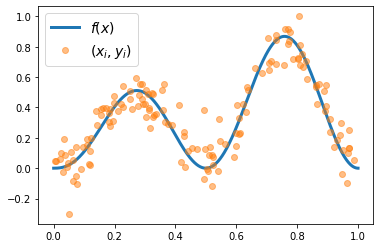

In [ ]:
def f(x):
    return np.sqrt(x)*np.sin(2*np.pi*x)**2

def make_data(size, s=0.1, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    x = np.random.uniform(size=size)
    y = f(x) + s*np.random.normal(size=size)
    return x, y

x, y = make_data(150, random_state=42)
t = np.linspace(0, 1, 1000)
plt.plot(t, f(t), lw=3, label="$f(x)$")
plt.plot(x, y, "o", label="$(x_i, y_i)$", alpha=0.5)
plt.legend(loc="upper left", fontsize=14)
plt.show()

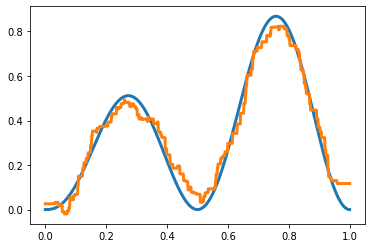

In [ ]:
X = x.reshape(-1, 1)
model = MyKNeighborsRegressor(k=10)
model.fit(X, y)
t = np.linspace(0, 1, 1000)
plt.plot(t, f(t), lw=3, label="$f(x)$")
plt.plot(t, model.predict(t.reshape(-1, 1)), lw=3)

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.estimator_checks import check_estimator

class MyKNeighborsRegressor(BaseEstimator, RegressorMixin):
  def __init__(self, k=5):
    self.k = k

  def fit(self, X, y):
    X, y = check_X_y(X, y)
    self.X_ = X
    self.y_ = y
    self.n_features_in_ = X.shape[1]
    return self # chaining!

  def predict(self, X):
    check_is_fitted(self)
    X = check_array(X)
    I = MyKNeighborsRegressor._nearest_neighbors(self.X_, X, k=self.k)
    y_pred = self.y_[I].mean(axis=0)
    return y_pred

  @staticmethod
  def _nearest_neighbors(X, Y, k=5):
    """
    Parameters
    ----------
    X : ndarray with shape (m, p)
        Array among whose rows the k nearest neighbors of the rows of Y are to be identified.
    Y : ndarray wth shape (n, p)
        The k nearest neighbors of the rows of Y are to be identified among the rows of X.
    k : int
        Number of nearest neighbors.    

    Returns
    -------
    I : ndarray with shape (k, n)
        Array of indices such that X[I[i, j]] is the i-th nearest neighbor of Y[j] among the rows of X.
    """
    m, p = X.shape
    n, q = Y.shape
    if p != q:
      raise ValueError("X and Y must have the same number of columns.")
    if m < k:
      raise ValueError(f"X must have at least {k} rows.")
    dists = np.linalg.norm(X.reshape(m, 1, p) - Y.reshape(1, n, p), axis=2)
    assert dists.shape == (m, n)
    return dists.argsort(axis=0)[:k]
    
check_estimator(MyKNeighborsRegressor())

In [ ]:
model = MyKNeighborsRegressor(k=10)
print(model.get_params())
model.set_params(k=50)
print(model.get_params())

{'k': 10}
{'k': 50}


In [ ]:
model.fit(X, y).score(X, y)

0.35358845057986565

In [ ]:
BaseEstimator().get_params()

{}

In [ ]:
model = MyKNeighborsRegressor()

In [ ]:
model.fit(X, y[:10])

ValueError: ignored